In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
columns=['gender','ever_married','work_type','Residence_type','smoking_status']
i=0
value=np.arange(5)
for i in value:
    
    data[columns[i]]=LabelEncoder().fit_transform(data[columns[i]])
    data_test[columns[i]]=LabelEncoder().fit_transform(data_test[columns[i]])
    
print(data.head())
print(data_test.head())

   id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   0       1  28.0             0              0             1          2   
1   1       1  33.0             0              0             1          2   
2   2       0  42.0             0              0             1          2   
3   3       1  56.0             0              0             1          2   
4   4       0  24.0             0              0             0          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1              79.53  31.1               2       0  
1               0              78.44  23.9               1       0  
2               0             103.00  40.3               0       0  
3               1              64.87  28.8               2       0  
4               0              73.36  28.8               2       0  
      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0  15304       0  57.0             0       

In [4]:
from sklearn.preprocessing import StandardScaler
columns2=['avg_glucose_level','bmi','age']
i=0
values=np.arange(3)
for i in values:
    data[[columns2[i]]]=StandardScaler().fit_transform(data[[columns2[i]]])
    data_test[[columns2[i]]]=StandardScaler().fit_transform(data_test[[columns2[i]]])
print(data.head())
print(data_test.head())

   id  gender       age  hypertension  heart_disease  ever_married  work_type  \
0   0       1 -0.625710             0              0             1          2   
1   1       1 -0.392544             0              0             1          2   
2   2       0  0.027154             0              0             1          2   
3   3       1  0.680018             0              0             1          2   
4   4       0 -0.812243             0              0             0          2   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1          -0.373297  0.444397               2       0  
1               0          -0.416084 -0.626698               1       0  
2               0           0.547988  1.813018               0       0  
3               1          -0.948757  0.102242               2       0  
4               0          -0.615493  0.102242               2       0  
      id  gender       age  hypertension  heart_disease  ever_married  \
0 

In [5]:
x=data.iloc[:,1:11]
y=data.iloc[:,11]
x_test=data_test.iloc[:,1:11]
x=x.T
x_test=x_test.T
y=np.array(y)
y=y.reshape(1,x.shape[1])
print(x.head())
print(y)
print(x_test.shape)


                 0         1         2         3         4         5      \
gender         1.00000  1.000000  0.000000  1.000000  0.000000  0.000000   
age           -0.62571 -0.392544  0.027154  0.680018 -0.812243 -0.345911   
hypertension   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
heart_disease  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
ever_married   1.00000  1.000000  1.000000  1.000000  0.000000  1.000000   

                  6         7         8         9      ...     15294    15295  \
gender         0.000000  1.000000  0.000000  0.000000  ...  1.000000  1.00000   
age            0.540119  1.705948  0.167054  0.959817  ...  1.752581 -1.37184   
hypertension   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00000   
heart_disease  0.000000  1.000000  0.000000  0.000000  ...  0.000000  0.00000   
ever_married   1.000000  1.000000  1.000000  1.000000  ...  1.000000  0.00000   

                  15296     15297     15298     15299   

In [6]:
#logistic regression
def sigmoid(a):    
    return 1/(1+np.exp(-a))
def model(X,Y,Learning_rate,Iteration):
    W=np.zeros((10,1))
    m=Y.size
    Y=np.array(Y)
    cost_list=[]
    B=0
        
    for i in np.arange(Iteration):
        z=(np.dot(W.T,X)+B)
        Y_pred=sigmoid(z)
        cost=(-1/m)*np.sum(Y*np.log(Y_pred)+(1-Y)*np.log(1-Y_pred))
        d_W=(1/m)*np.dot((Y_pred-Y),X.T)
        d_b=(1/m)*np.sum(Y_pred-Y)
        W=W-Learning_rate*d_W.T
        B=B-Learning_rate*d_b
        cost_list.append(cost)
        
        if(i%(Iteration/5)==0 or i==(Iteration-1)):
            print(cost)
    return W, B, cost_list 

In [7]:
Learning_rate=0.001
IteratioN = 10000
w,b,cost_list=model(x,y,Learning_rate=Learning_rate,Iteration=IteratioN)


0.6931471805599453
0.20101023723486225
0.182696367284371
0.17614121170319982
0.17189594116629894
0.16857904336809543


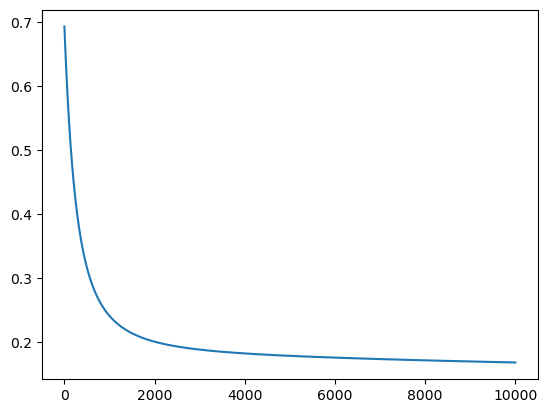

In [8]:
range=np.arange(0,IteratioN)
plt.plot(range,cost_list)
plt.show()

In [9]:
submission=data_test[["id"]]
print(submission)
predicted_value=sigmoid(np.dot(w.T,x_test)+b)
print(predicted_value.shape)
submission["stroke"]=predicted_value.T

          id
0      15304
1      15305
2      15306
3      15307
4      15308
...      ...
10199  25503
10200  25504
10201  25505
10202  25506
10203  25507

[10204 rows x 1 columns]
(1, 10204)


C:\Users\VAGEESH DUBEY\AppData\Local\Temp\ipykernel_18500\752068731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["stroke"]=predicted_value.T


In [10]:
submission

,id,stroke
0,15304,0.113021
1,15305,0.091379
2,15306,0.013737
3,15307,0.090808
4,15308,0.020803
...,...,...
10199,25503,0.027292
10200,25504,0.079166
10201,25505,0.016609
10202,25506,0.020608


In [11]:
submission.to_csv("submission.csv", index=None)

In [12]:
pd.read_csv("submission.csv")

,id,stroke
0,15304,0.113021
1,15305,0.091379
2,15306,0.013737
3,15307,0.090808
4,15308,0.020803
...,...,...
10199,25503,0.027292
10200,25504,0.079166
10201,25505,0.016609
10202,25506,0.020608
